## Load fill and beam modes

In [1]:
import pytimber
import datetime
import pagestore
import time, calendar
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Retrieve data from database and start analysis

In [2]:
%matplotlib notebook
db=pagestore.PageStore('/home/nbiancac/HDD/Work/MD/LHC/DB/lhc.db','/home/nbiancac/HDD/Work/MD/LHC/DB/')
import LHC_BBQ, LHC_BCT, LHC_Energy, LHC_Coll, LHC_BQM, LHC_BSRT, LHC_FBCT

filln=5130
output_path='/home/nbiancac/HDD/Work/MD/LHC/'+str(filln)+'/'
# os.mkdir(output_path)
tag='instability'
beam=2

ts1 = calendar.timegm(time.strptime("2016-07-29 07:01:00","%Y-%m-%d %H:%M:%S"))-2*3600
ts2 = calendar.timegm(time.strptime("2016-07-29 07:06:00","%Y-%m-%d %H:%M:%S"))-2*3600

print datetime.datetime.fromtimestamp(ts1)
print datetime.datetime.fromtimestamp(ts2)


2016-07-29 06:58:00
2016-07-29 07:06:00


In [3]:
# RAW BBQ
data=db.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
BBQ_RAW=LHC_BBQ.BBQHS_RAW(data,beam=beam)
del(data)

Rebalance RPMBB.RR13.ROF.A81B2:I_MEAS


<IPython.core.display.Javascript object>


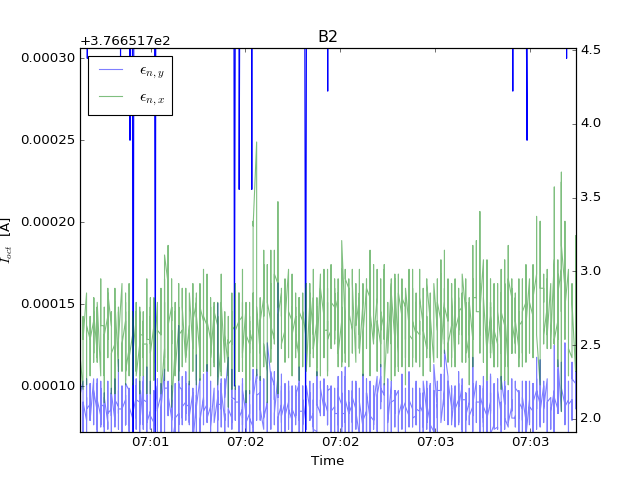

In [28]:
# Octupole
mdb=pytimber.LoggingDB(source = 'mdb')
data=mdb.get('RPMBB%ROF.A81B'+str(beam)+':I_MEAS',ts1,ts2)
db.store(data)

data=db.get('RPMBB%ROF.A81B'+str(beam)+':I_MEAS',ts1,ts2)
tt, vv = data['RPMBB.RR13.ROF.A81B'+str(beam)+':I_MEAS']

oct_time_str=[datetime.datetime.fromtimestamp(tt[ii]) for ii in np.arange(len(tt))]

N=1

plt.figure()
ax1 = plt.subplot(111)
h0, = plt.plot(oct_time_str, vv, "-b")
plt.xlabel("Time")
plt.ylabel("$I_{oct}$  [A]")
plt.title('B%d'%(beam))

ax2=ax1.twinx()
h1, = ax2.plot(BSRT.t_str,np.convolve(BSRT.norm_emit_v,np.ones(N),mode='same'),alpha=0.5)
h2, = ax2.plot(BSRT.t_str,np.convolve(BSRT.norm_emit_h,np.ones(N),mode='same'),alpha=0.5)
plt.legend([h1,h2],['$\epsilon_{n,y}$','$\epsilon_{n,x}$'],loc=2)

xfmt = mpl.dates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(xfmt)

<IPython.core.display.Javascript object>


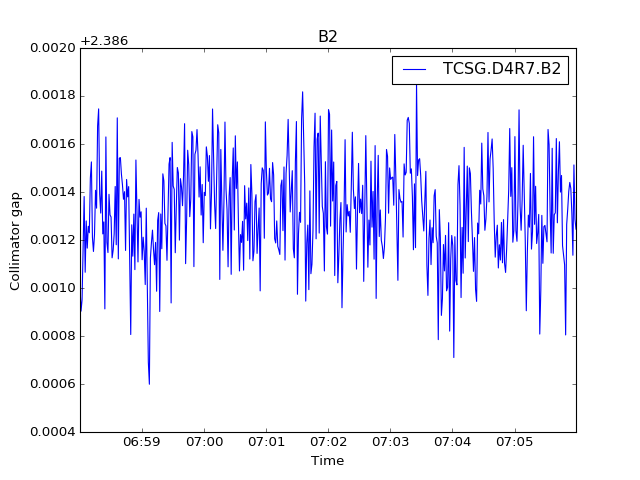

'/home/nbiancac/HDD/Work/MD/LHC/5130/instability_gap_B2.pdf'

In [4]:
# Collimators
data=db.get(LHC_Coll.variable_list(beam),ts1,ts2)

Coll=LHC_Coll.Coll(data,beam=beam)
typecoll=['L','R']
namecoll = 'TCSG.D4'+typecoll[beam-1]+'7.B'+str(beam)
Coll.select_coll(namecoll+':MEAS_LVDT_GU')

plt.figure()
plt.plot(Coll.t_str, Coll.values, "-b")
plt.xlabel("Time")
plt.ylabel("Collimator gap")
plt.title('B%d'%(Coll.beam))
plt.legend([namecoll])
xfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.savefig(output_path+tag+'_gap_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_gap_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_gap_B'+str(beam)+'.pdf'

### BSRT

['LHC.BSRT.5L4.B2:FIT_SIGMA_H', 'LHC.BSRT.5L4.B2:FIT_SIGMA_V', 'LHC.BSRT.5L4.B2:GATE_DELAY']
expanding 0.0%
calc. emitt. 0.0%


<IPython.core.display.Javascript object>


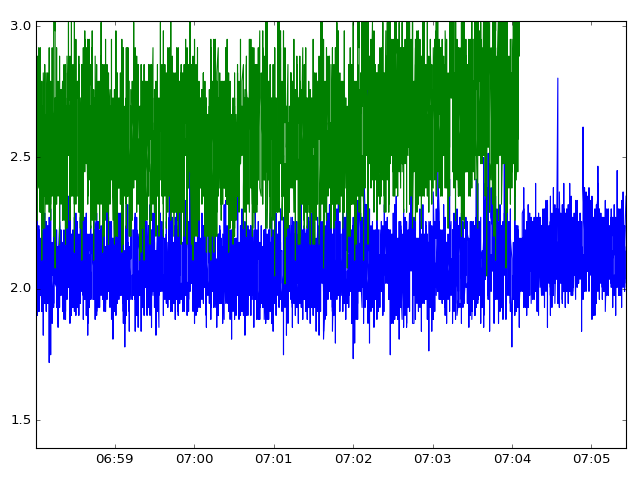

'/home/nbiancac/HDD/Work/MD/LHC/5130/instability_emit_B2.pdf'

In [5]:
data=db.get(LHC_BSRT.variable_list(beams=[beam]),ts1,ts2)

import TimberManager as tm

varlist = LHC_BSRT.variable_list(beams=[beam])
print varlist
sigma_h = tm.timber_variable_list()
sigma_v = tm.timber_variable_list()
gate = tm.timber_variable_list()
sigma_h.t_stamps, sigma_h.values = data[varlist[0]]
sigma_v.t_stamps, sigma_v.values = data[varlist[1]]
sigma_v.t_str=[datetime.datetime.fromtimestamp(sigma_v.t_stamps[ii]) for ii in np.arange(len(sigma_v.t_stamps))]
gate.t_stamps, gate.values = data[varlist[2]]

dict_timber={}
dict_timber[varlist[0]]=sigma_h
dict_timber[varlist[1]]=sigma_v
dict_timber[varlist[2]]=gate
BSRT=LHC_BSRT.BSRT(dict_timber,beam=beam)

# Energy
data=db.get(LHC_Energy.variable_list(beams=[beam]),ts1,ts2)
Energy = LHC_Energy.energy(data, beam = beam)
LHC_Energy.variable_list(beams=[beam])
del(data)

BSRT.calculate_emittances(Energy)
plt.figure()

plt.plot(BSRT.t_str,BSRT.norm_emit_v)
plt.plot(BSRT.t_str,BSRT.norm_emit_h)
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
plt.tight_layout()
plt.ylim(0,5)

plt.savefig(output_path+tag+'_emit_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_emit_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_emit_B'+str(beam)+'.pdf'


### BBQ Spectrogram

In [45]:
1*1.2/0.97


1.2371134020618557

<IPython.core.display.Javascript object>


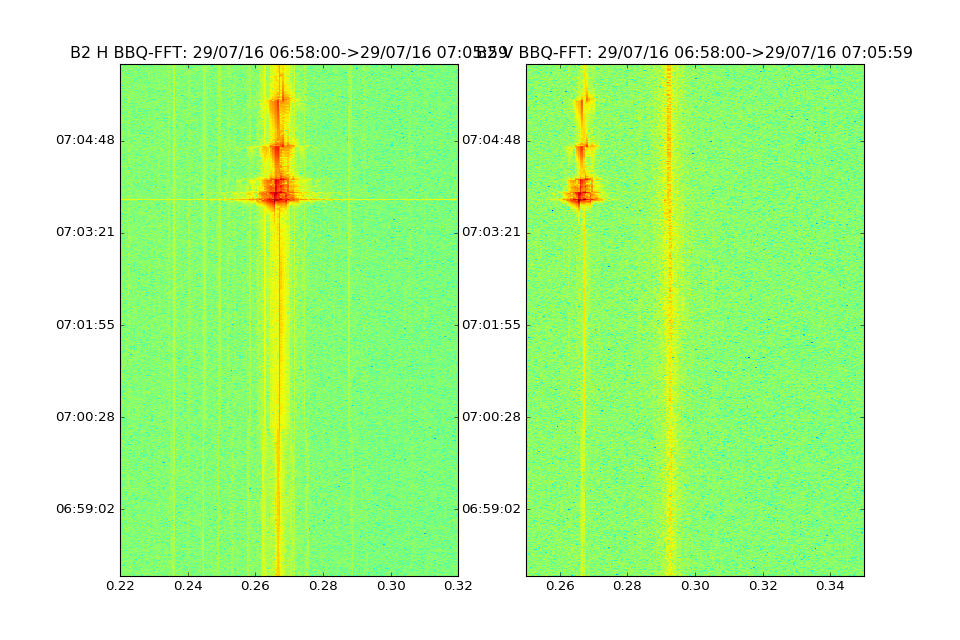

'/home/nbiancac/HDD/Work/MD/LHC/5130/instability_specgram_B2.pdf'

In [7]:
from scipy import signal

f, t, Sxx = signal.spectrogram(BBQ_RAW.h, fs = 1, nperseg = 2048, noverlap=0)

plt.figure(figsize=(12,8))
ax1 = plt.subplot(121)
mindate = mpl.dates.date2num(BBQ_RAW.t_str[0])
maxdate = mpl.dates.date2num(BBQ_RAW.t_str[-1])
plt.imshow(np.log10(np.squeeze(Sxx)), origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = mpl.dates.DateFormatter('%H:%M:%S')
plt.gca().yaxis.set_major_formatter(hfmt)

plt.title('B%d H BBQ-FFT: '%BBQ_RAW.beam +
    str(BBQ_RAW.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_RAW.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

plt.xlim(0.22, 0.32)


f, t, Syy = signal.spectrogram(BBQ_RAW.v, fs = 1, nperseg = 2048, noverlap=0)

ax1 = plt.subplot(122)
mindate = mpl.dates.date2num(BBQ_RAW.t_str[0])
maxdate = mpl.dates.date2num(BBQ_RAW.t_str[-1])
plt.imshow(np.log10(np.squeeze(Syy)), origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = mpl.dates.DateFormatter('%H:%M:%S')
plt.gca().yaxis.set_major_formatter(hfmt)

plt.title('B%d V BBQ-FFT: '%BBQ_RAW.beam +
    str(BBQ_RAW.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_RAW.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

plt.xlim(0.25, 0.35)


del(Sxx,Syy)

plt.savefig(output_path+tag+'_specgram_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_specgram_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_specgram_B'+str(beam)+'.pdf'

### Sussix

In [8]:
import PySussix as ps

# Sussix settings
nt1=1; nt2=2048;
nharm = 15

tunex0 = 0.27
tuney0 = 0.295
ex0 = 1e-3
ey0 = 1e-3

tuney_vec=[];tunex_vec=[];
spec_ox=[]; spec_oy=[];
spec_ax=[]; spec_ay=[];
spec_t=[];

for ii in np.arange(0, len(BBQ_RAW.v)):
    
    datax=BBQ_RAW.h[ii][nt1:nt2]-np.mean(BBQ_RAW.h[ii][nt1:nt2])
    datay=BBQ_RAW.v[ii][nt1:nt2]-np.mean(BBQ_RAW.v[ii][nt1:nt2])
    spec=ps.Sussix()
    spec.sussix_inp(nt1=nt1,nt2=nt2,tunex=tunex0,tuney=tuney0,ex=ex0,ey=ey0,ir=1,nharm=nharm)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    

    
    spec.ox=np.abs(spec.ox)
    spec.oy=np.abs(spec.oy)
    
    spec_ox.append(spec.ox[0:nharm-1])
    spec_oy.append(spec.oy[0:nharm-1])
    spec_ax.append(spec.ax[0:nharm-1])
    spec_ay.append(spec.ay[0:nharm-1])
    spec_t.append(BBQ_RAW.t_stamps[ii]*(1+np.random.randn(1,nharm-1)*1e-12))
    
    del(datax,datay)

In [9]:
[tunex_min, tunex_max] = np.sort([0.265 , 0.2665])
[tuney_min, tuney_max] = np.sort([0.2905 , 0.2935])

rangex=np.array([tunex_min, tunex_max])
rangey=np.array([tuney_min, tuney_max])

tuney_vec=[]; ay_vec=[]

for ii,index in enumerate((np.abs(spec_oy) < rangey.max()) & (np.abs(spec_oy) > rangey.min())):
    spec.oy = np.squeeze(spec_oy[ii])[index]
    spec.ay = np.squeeze(spec_ay[ii])[index]
    
    if len(spec.ay):
        tuney=spec.oy[spec.ay.argmax()]
        ay=spec.ay[spec.ay.argmax()]
    else:
        tuney=np.NaN
        ay=np.NaN
    tuney_vec.append(tuney)
    ay_vec.append(ay)

BBQ_RAW.qv=np.array(tuney_vec)
BBQ_RAW.av=np.array(ay_vec)

tunex_vec=[]; ax_vec=[]

for ii,index in enumerate((np.abs(spec_ox) < rangex.max()) & (np.abs(spec_ox) > rangex.min())):
    spec.ox = np.squeeze(spec_ox[ii])[index]
    spec.ax = np.squeeze(spec_ax[ii])[index]
    
    if len(spec.ax):
        tunex=spec.ox[spec.ax.argmax()]
        ax=spec.ax[spec.ax.argmax()]
    else:
        tunex=np.NaN
        ax=np.NaN
    tunex_vec.append(tunex)
    ax_vec.append(ax)
    
    
BBQ_RAW.qh=np.array(tunex_vec)
BBQ_RAW.ah=np.array(ax_vec)


<IPython.core.display.Javascript object>


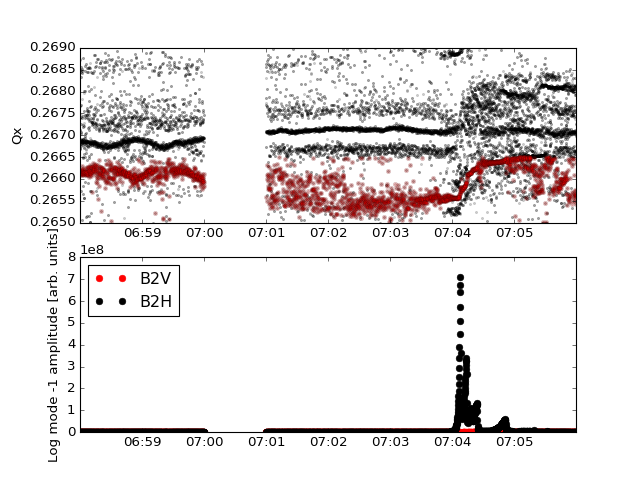

'/home/nbiancac/HDD/Work/MD/LHC/5130/instability_sussix_B2.pdf'

In [14]:
t_stamp = np.squeeze(np.reshape(np.asarray(spec_t),(1,-1)))
t_str = [datetime.datetime.fromtimestamp(x) for x in t_stamp]

plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(t_str,np.squeeze(np.reshape(np.asarray(spec_ox),(1,-1))),'ok',alpha=0.2,markerfacecolor='k', markersize=2)
plt.plot(BBQ_RAW.t_str,BBQ_RAW.qh,'or',alpha=0.2,markerfacecolor='r', markersize=4)
plt.ylabel('Qx')
plt.ylim(0.265 ,0.269)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

# plot amplitude of selected line
ax1 = plt.subplot(2,1,2,  sharex=ax1)
ax1.plot(BBQ_RAW.t_str,BBQ_RAW.av,'or',markeredgecolor='r')
ax1.plot(BBQ_RAW.t_str, BBQ_RAW.ah,'ok',markeredgecolor='k')
plt.legend(['B'+str(beam)+'V','B'+str(beam)+'H'], loc=2)
# ylim(0.290 ,0.3)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
plt.ylabel('Log mode -1 amplitude [arb. units]')

plt.savefig(output_path+tag+'_sussix_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_sussix_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_sussix_B'+str(beam)+'.pdf'

<IPython.core.display.Javascript object>


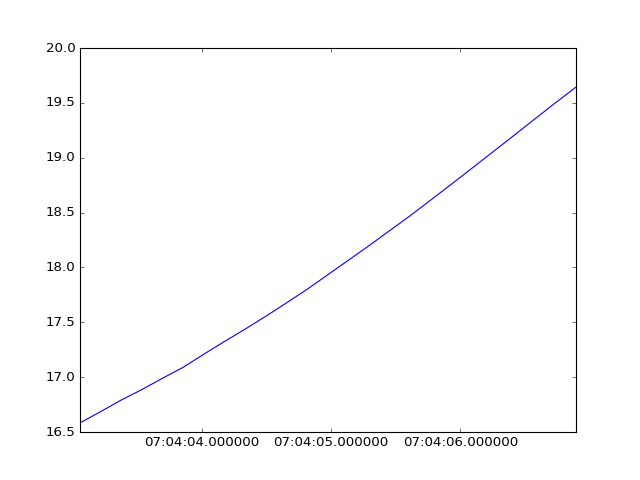

<IPython.core.display.Javascript object>


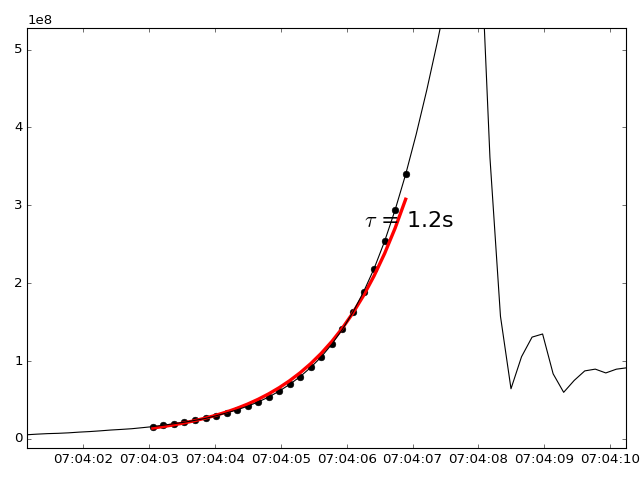

'/home/nbiancac/HDD/Work/MD/LHC/5130/instability_risetime_B2.pdf'

In [43]:
fit_ts1 = calendar.timegm(time.strptime("2016-07-29 07:04:03","%Y-%m-%d %H:%M:%S"))-2*3600
fit_ts2 = calendar.timegm(time.strptime("2016-07-29 07:04:07","%Y-%m-%d %H:%M:%S"))-2*3600
fit_select = np.where((BBQ_RAW.t_stamps > fit_ts1)&(BBQ_RAW.t_stamps < fit_ts2))

fit_time_stamps = BBQ_RAW.t_stamps[fit_select]
fit_ay = BBQ_RAW.ah[fit_select]

fit_select=np.where(~np.isnan(fit_ay))
fit_time_stamps = fit_time_stamps[fit_select]
fit_ay = fit_ay[fit_select]


p = np.polyfit(fit_time_stamps, np.log(fit_ay), 1)


fit_exp = np.exp(fit_time_stamps*p[0]+p[1])
fit_t_str=[datetime.datetime.fromtimestamp(fit_time_stamps[ii]) for ii in np.arange(len(fit_time_stamps))]

plt.figure()
ax1 = plt.plot(fit_t_str, np.log(fit_ay))

plt.figure()
ax1 =plt.subplot(111)
plt.plot(fit_t_str, fit_ay,'ok')
plt.plot(fit_t_str, fit_exp,'-r',linewidth=3)
ax1.plot(BBQ_RAW.t_str, BBQ_RAW.ah,'-k',markeredgecolor='k')

xfmt = mpl.dates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(xfmt)
plt.tight_layout()
# plt.xlim(fit_ts1, fit_ts2)
plt.annotate(r'$\tau$ = %.1fs'%(1./p[0]),xy=(fit_t_str[20], 0.8*fit_ay.max()), size = 20)

plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_risetime_B'+str(beam)+'.pdf'

In [46]:
plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_risetime_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_risetime_B'+str(beam)+'.pdf'

'/home/nbiancac/HDD/Work/MD/LHC/5130/instability_risetime_B2.pdf'